In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
rock_muon_ranges_1TeV = np.loadtxt("rock_muon_ranges_1TeV.txt", dtype=float)/100
rock_muon_ranges_10TeV = np.loadtxt("rock_muon_ranges_10TeV.txt", dtype=float)/100
rock_muon_ranges_100GeV = np.loadtxt("rock_muon_ranges_100GeV.txt", dtype=float)/100

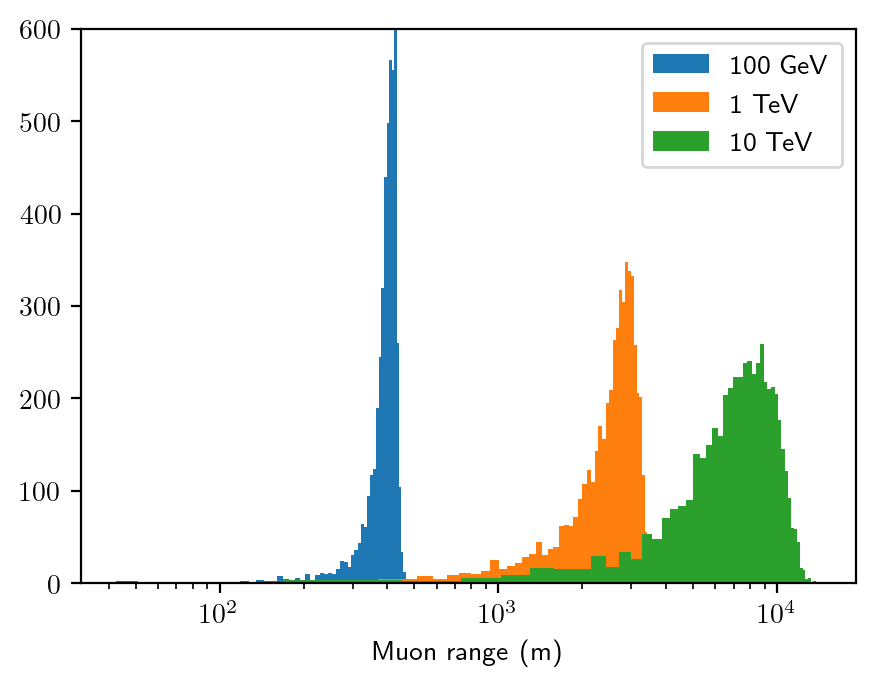

In [23]:
plt.rcParams['text.usetex'] = True
fig = plt.figure(figsize=(5, 3.6), dpi=200)

plt.hist(rock_muon_ranges_100GeV, bins=50, label='100 GeV')
plt.hist(rock_muon_ranges_1TeV, bins=50, label='1 TeV')
plt.hist(rock_muon_ranges_10TeV, bins=50, label='10 TeV')
plt.ylim(0,600)
plt.xlabel('Muon range (m)')
plt.xscale('log')
plt.legend()

In [4]:
dataset = pd.read_csv("/Users/alexwen/muon_propagator/LI_NuMu_yColumnDepthInjection_propagated.txt",\
                     sep=' ', comment='#')

In [5]:
dataset

,Enu,Ex,El,Plx,Ply,Plz,vtx_x,vtx_y,vtx_z,mu_propagated_dist,vtx_dist_to_detector,E_mu_at_detector,w
0,31293.20,22665.800,8628.330,-23.34490,8628.300,0.031717,8.724880,-4949.13,-9.290800,500.829,4949.15,0.105658,1.378960e-18
1,8258.23,4340.580,3918.590,-19.76170,3918.500,18.293200,9.147510,-1215.33,-15.474900,1738.220,1215.47,428.292000,3.466300e-19
2,17766.10,7221.230,10545.800,-10.98970,10545.800,-17.573800,5.089050,-2812.70,11.765200,2917.040,2812.73,61.733300,7.983890e-19
3,33647.90,9320.970,24327.900,-69.20080,24327.800,-29.759600,10.953600,-6544.64,6.644720,4069.610,6544.65,0.105658,1.473350e-18
4,8563.50,127.393,8437.050,-2.25939,8437.040,-4.629650,-5.242020,-1553.09,-4.269880,2170.010,1553.10,681.638000,3.615830e-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12647,2252.44,359.990,1893.390,11.84190,1893.340,-5.348360,-13.914300,-2244.59,15.220200,1266.240,2244.68,0.105658,6.327220e-20
12648,53637.80,39970.500,13668.300,-8.46689,13668.300,2.711690,5.831630,-1247.84,-0.022773,2550.500,1247.85,1628.020000,2.214060e-18
12649,22194.80,13762.400,8433.410,1.97863,8433.410,3.150450,5.618770,-4898.98,6.667870,2017.740,4898.99,0.105658,9.962480e-19
12650,40445.00,969.448,39476.500,15.27030,39476.500,-14.267100,7.782190,-2630.94,-4.518080,2283.970,2630.96,0.105658,1.736590e-18


In [6]:
dataset_cut = dataset[dataset['E_mu_at_detector']>1]

E_at_det = np.asarray(dataset_cut['E_mu_at_detector'])
weights = np.asarray(dataset_cut['w'])

In [7]:
E_at_det.size / np.asarray(dataset['E_mu_at_detector']).size

0.4545526398988302

Text(0.5, 1.0, 'Muons that reach detector')

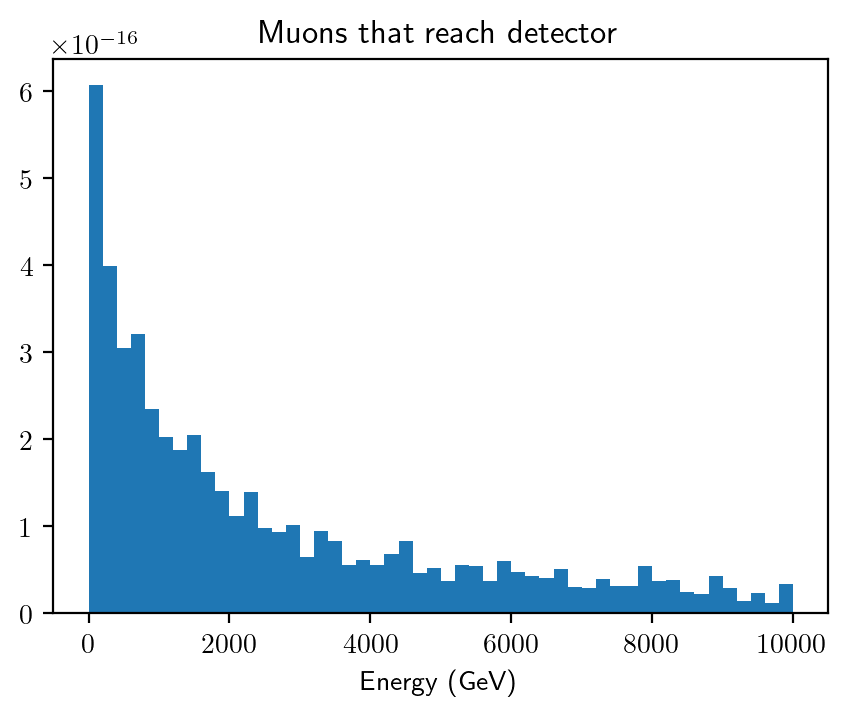

In [8]:
plt.rcParams['text.usetex'] = True
fig = plt.figure(figsize=(5, 3.6), dpi=200)

plt.hist(E_at_det, weights=weights, bins=50, range=(0,10000))
#plt.ylim(0,600)
plt.xlabel('Energy (GeV)')
plt.title('Muons that reach detector')

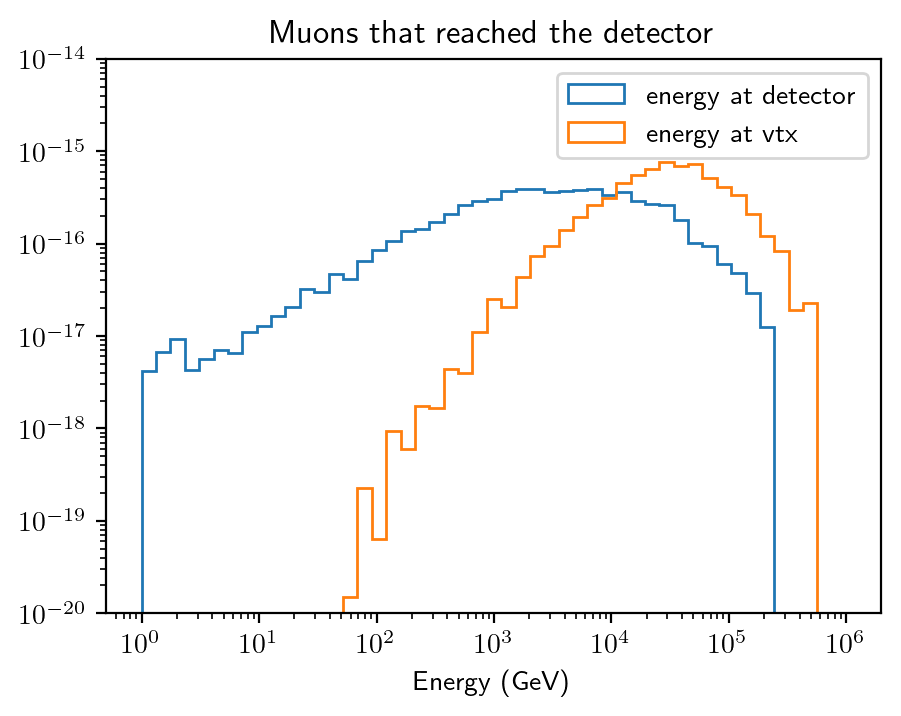

In [9]:
plt.rcParams['text.usetex'] = True
fig = plt.figure(figsize=(5, 3.6), dpi=200)

bins = np.logspace(np.log10(1e0), np.log10(1e6), 50)
plt.hist(E_at_det, weights=weights, bins=bins, range=(0,100000), fill=False, histtype='step', label='energy at detector')
plt.hist(dataset_cut['El'], weights=weights, bins=bins, range=(0,100000), fill=False, histtype='step', label='energy at vtx')
#plt.ylim(0,600)
plt.xlabel('Energy (GeV)')
plt.title('Muons that reached the detector')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-20, 1e-14)
plt.legend()

In [10]:
propagated_dists = dataset['mu_propagated_dist']

Text(0.5, 1.0, 'Propagated Distance')

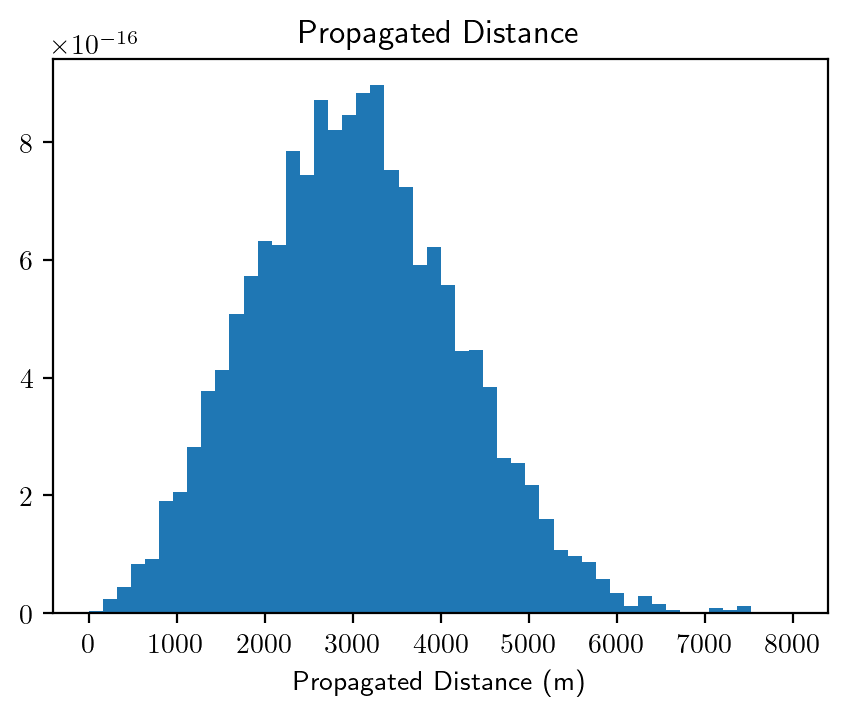

In [11]:
plt.rcParams['text.usetex'] = True
fig = plt.figure(figsize=(5, 3.6), dpi=200)

plt.hist(propagated_dists, weights=dataset['w'], bins=50, range=(0,8000))
#plt.ylim(0,600)
plt.xlabel('Propagated Distance (m)')
plt.title('Propagated Distance')

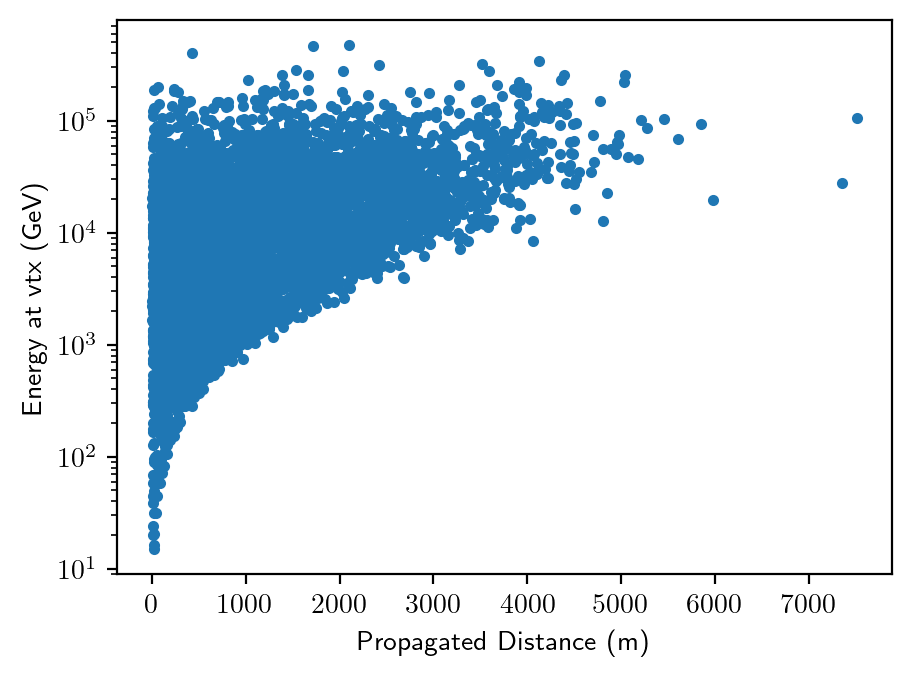

In [15]:
vtx_dist = dataset_cut['vtx_dist_to_detector']

plt.rcParams['text.usetex'] = True
fig = plt.figure(figsize=(5, 3.6), dpi=200)

plt.scatter(vtx_dist, dataset_cut['El'], marker='.')
#plt.ylim(0,600)
plt.xlabel('Propagated Distance (m)')
plt.ylabel('Energy at vtx (GeV)')
plt.yscale('log')